"""
📘 Notebook: eda.ipynb
----------------------------------
Purpose:
- Understand the structure, types, and quality of the dataset.
- Explore distributions of key features like experience, salary, education.
- Check class balance of the target variable `is_fit`.
- Uncover relationships and correlations between variables.
- Identify anomalies, missing values, and potential feature engineering ideas.

Inputs:
- data/raw/ai_hiring_dataset.csv

Outputs:
- Visualizations in-place
- Observations documented in markdown cells
- No file outputs yet (handled in preprocessing notebook)
"""

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as n

In [22]:
# Settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [23]:
# Load the dataset
df = pd.read_csv('/Users/nikhilraj/Documents/HiringAiModel/data/ai_hiring_assignment_dataset_5000.csv')
# Overview
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   candidate_skills     5000 non-null   object
 1   years_experience     5000 non-null   int64 
 2   education_level      5000 non-null   object
 3   past_job_titles      5000 non-null   object
 4   certifications       4475 non-null   object
 5   expected_salary      5000 non-null   int64 
 6   candidate_location   5000 non-null   object
 7   job_title            5000 non-null   object
 8   required_skills      5000 non-null   object
 9   min_experience       5000 non-null   int64 
 10  job_description      5000 non-null   object
 11  budgeted_salary_min  5000 non-null   int64 
 12  budgeted_salary_max  5000 non-null   int64 
 13  job_location         5000 non-null   object
 14  is_fit               5000 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 586.1+ KB


,years_experience,expected_salary,min_experience,budgeted_salary_min,budgeted_salary_max,is_fit
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.049000,99628.256800,5.076000,79761.885800,130404.764000,0.038800
std,3.802669,28887.591416,3.164969,11471.314108,17298.181079,0.193137
min,0.000000,50004.000000,0.000000,60004.000000,100070.000000,0.000000
25%,3.000000,74454.750000,2.000000,69964.250000,115582.750000,0.000000
50%,6.000000,99489.000000,5.000000,79582.500000,130498.500000,0.000000
75%,10.000000,124877.250000,8.000000,89655.000000,145257.500000,0.000000
max,12.000000,149969.000000,10.000000,99990.000000,159995.000000,1.000000


In [24]:
# Missing values
df.isnull().sum()

candidate_skills         0
years_experience         0
education_level          0
past_job_titles          0
certifications         525
expected_salary          0
candidate_location       0
job_title                0
required_skills          0
min_experience           0
job_description          0
budgeted_salary_min      0
budgeted_salary_max      0
job_location             0
is_fit                   0
dtype: int64

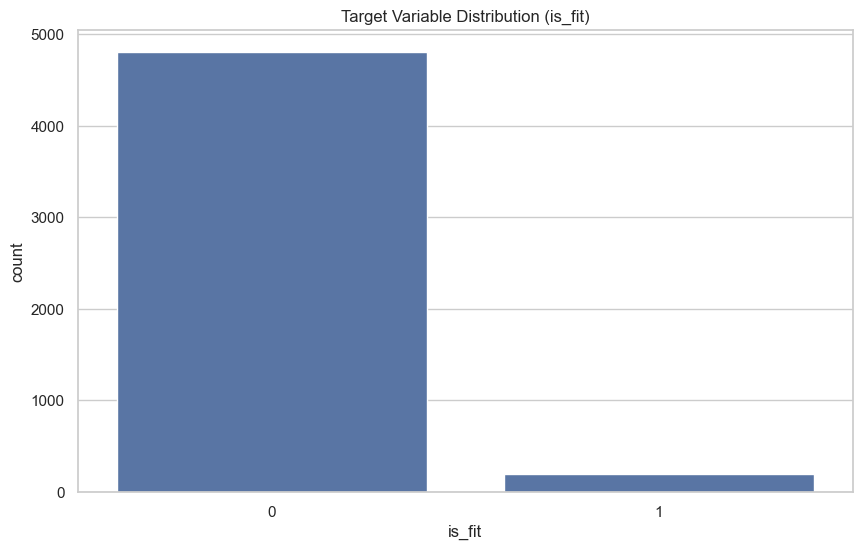

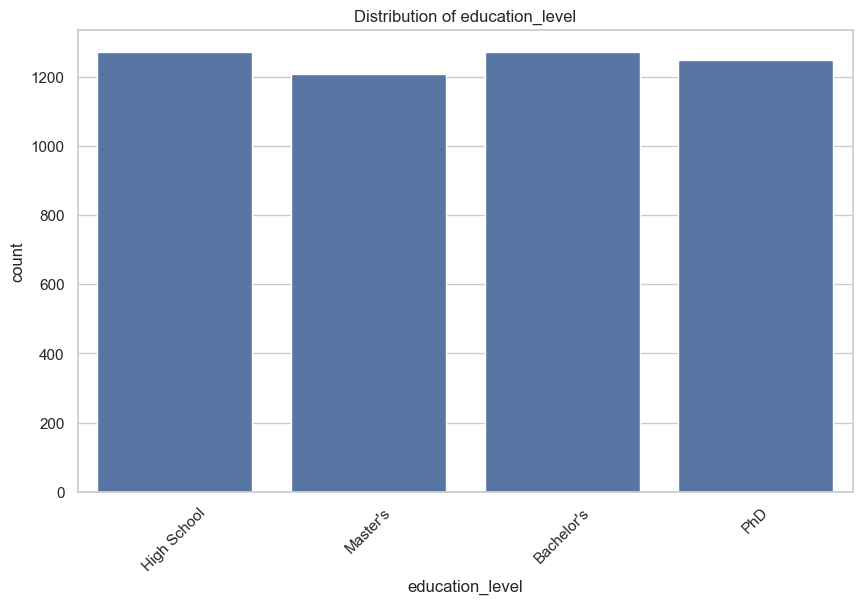

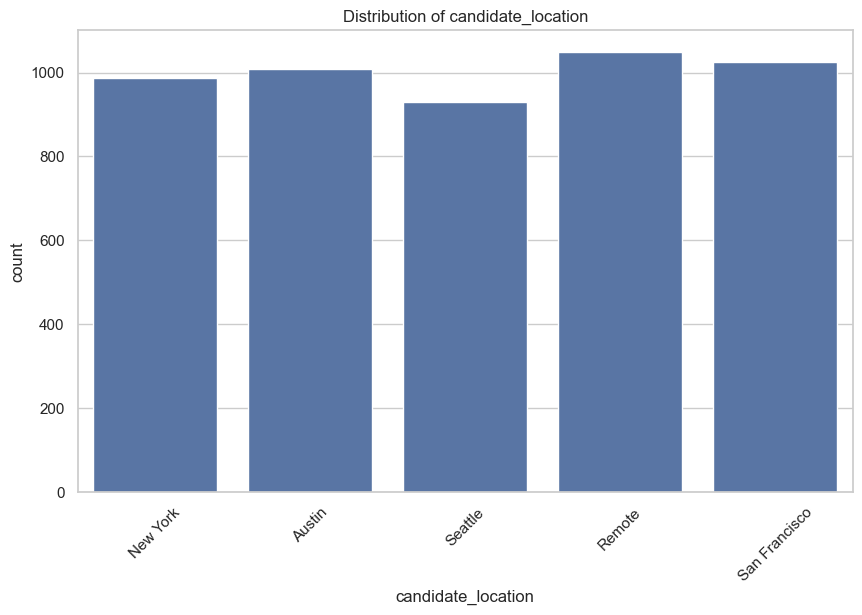

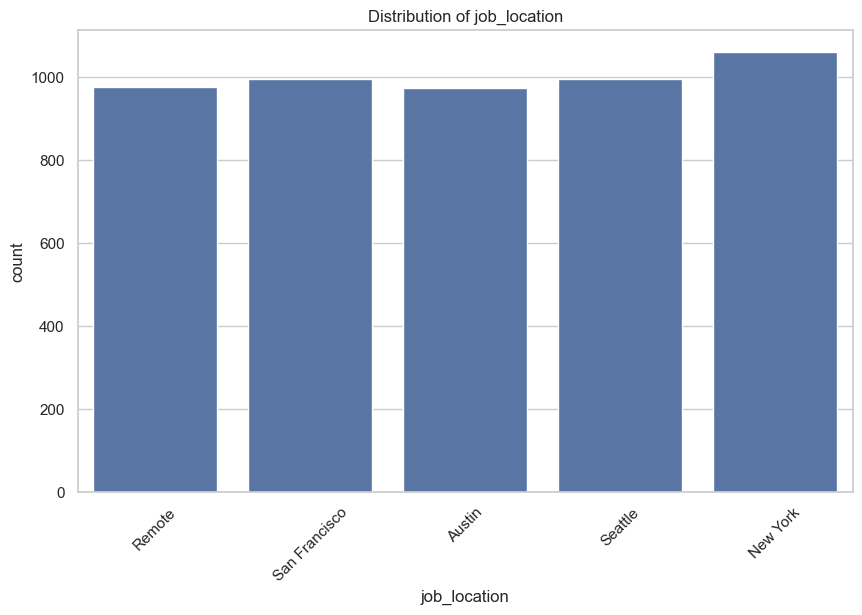

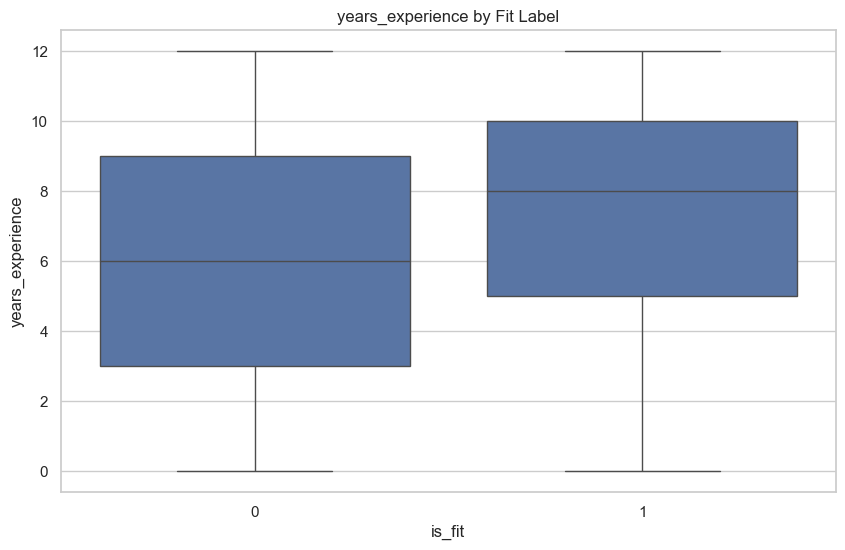

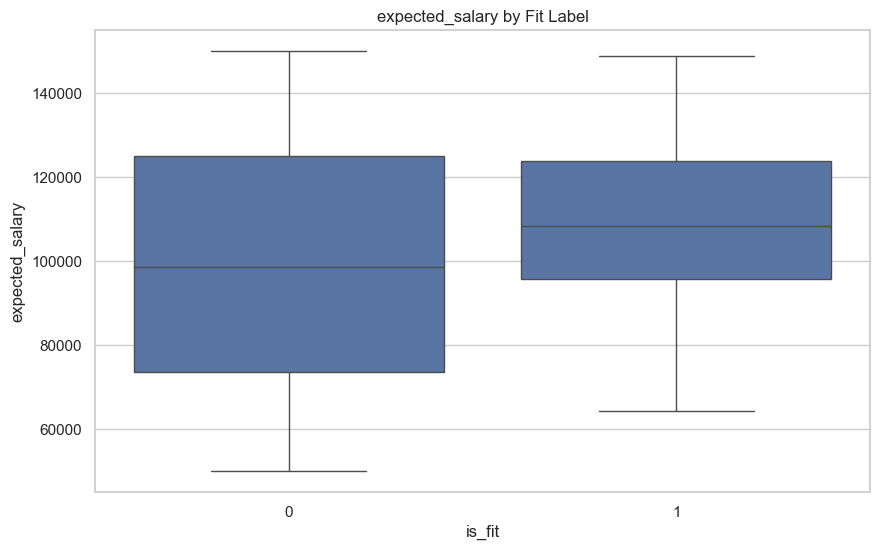

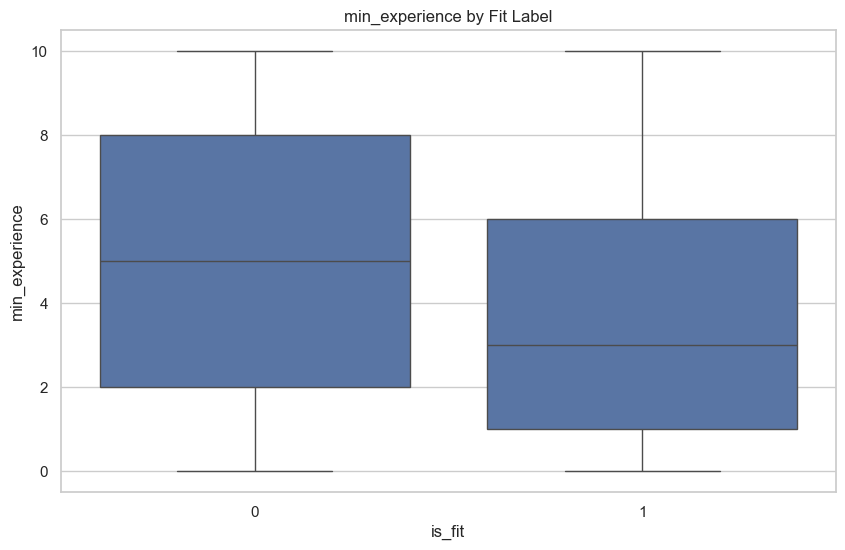

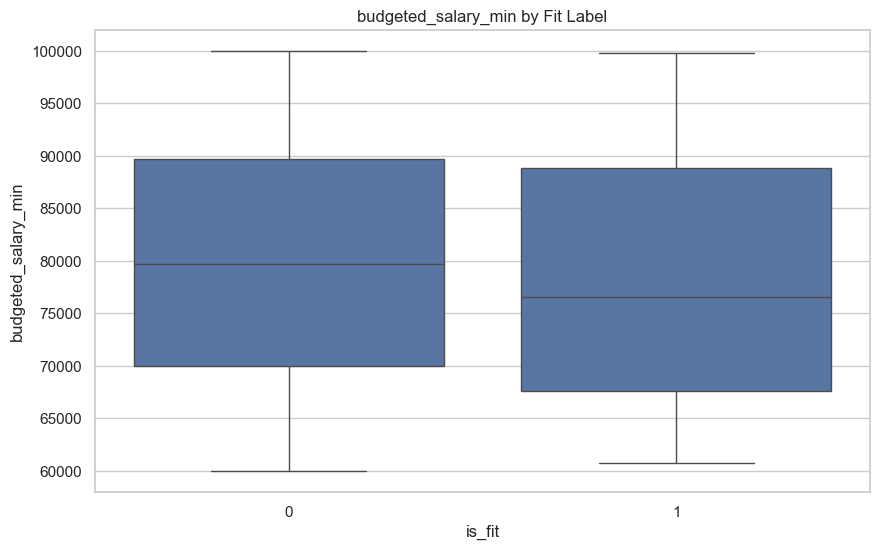

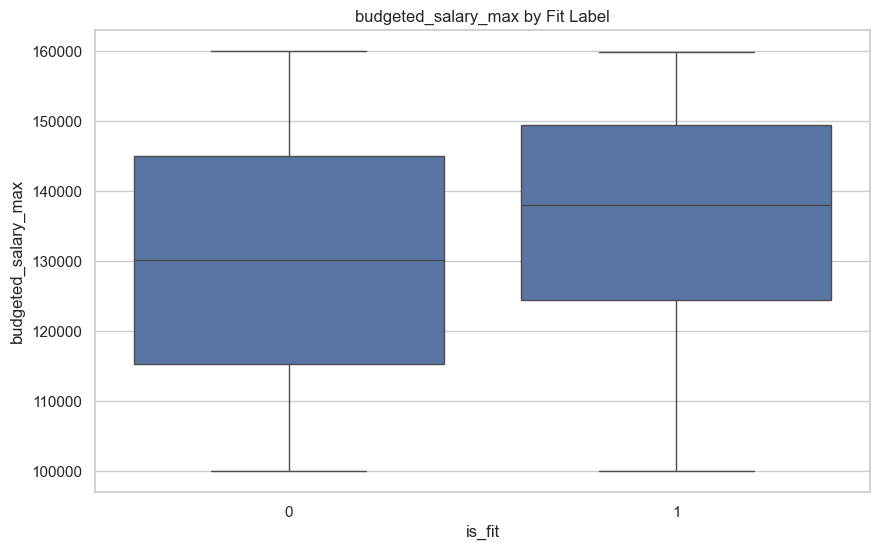

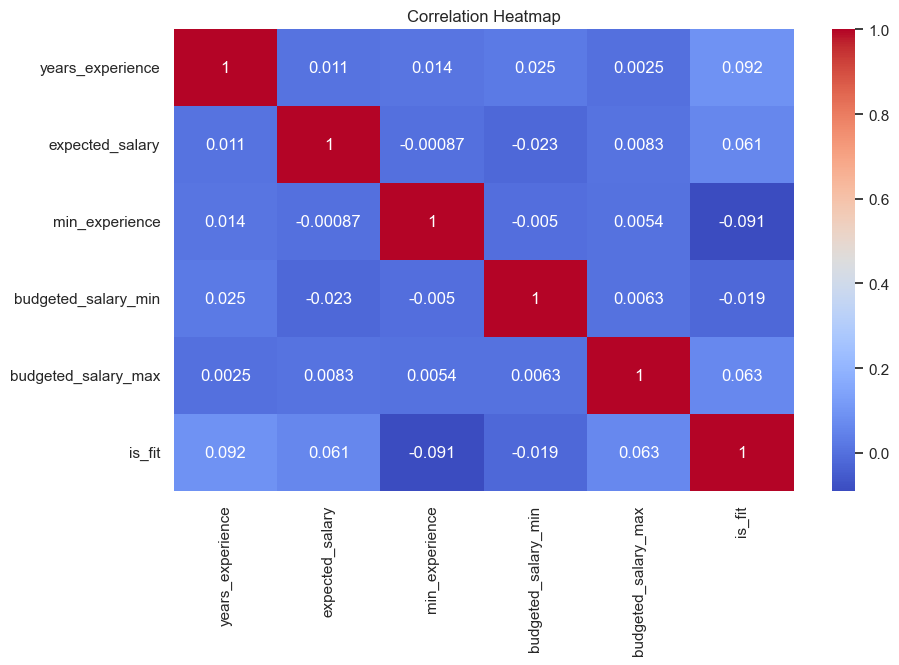

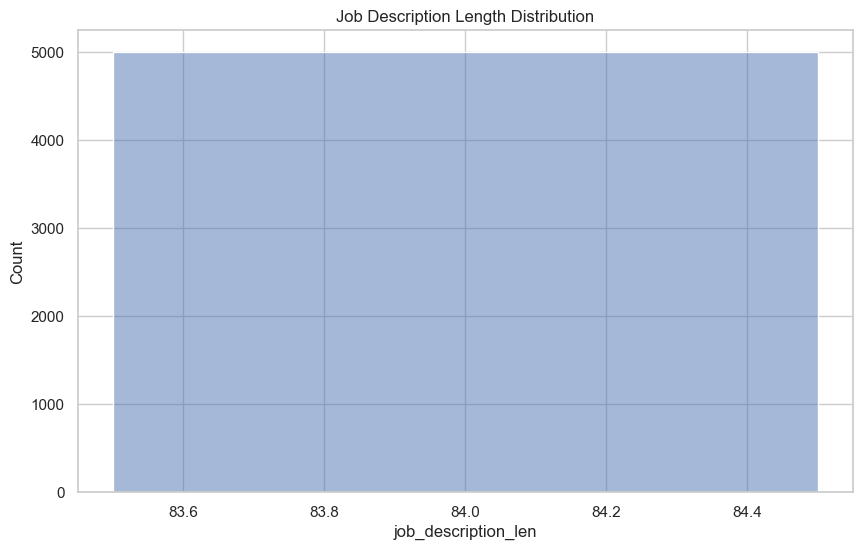

/Users/nikhilraj/Documents/HiringAiModel/.aihiringvenv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/nikhilraj/Documents/HiringAiModel/.aihiringvenv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/nikhilraj/Documents/HiringAiModel/.aihiringvenv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())
/Users/nikhilraj/Documents/HiringAiModel/.aihiringvenv/lib/python3.13/site-packages/seaborn/external/kde.py:248: RuntimeWarning: divide by zero encountered in dot
  scaled_dataset = dot(whitening, self.dataset)
/Users/nikhilraj/Documents/HiringAiModel/.aihiringvenv/lib/python3.13/site-packages/seaborn/external/kde.py:248: RuntimeWarning: overflow encountered in dot
  scaled_dataset = dot(whitening, self.datase

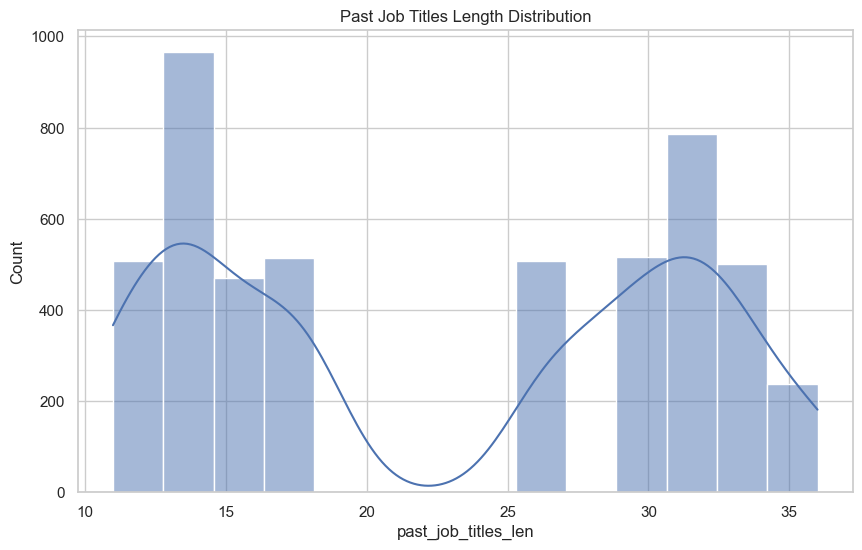

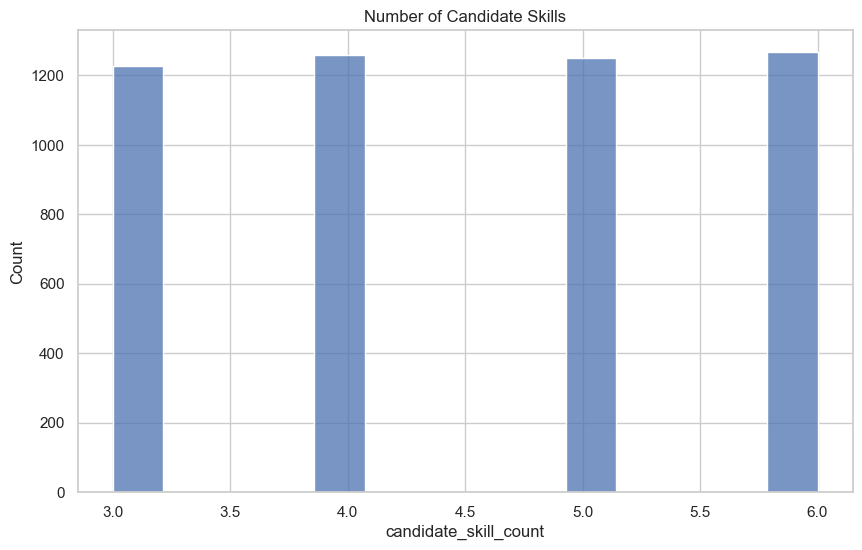

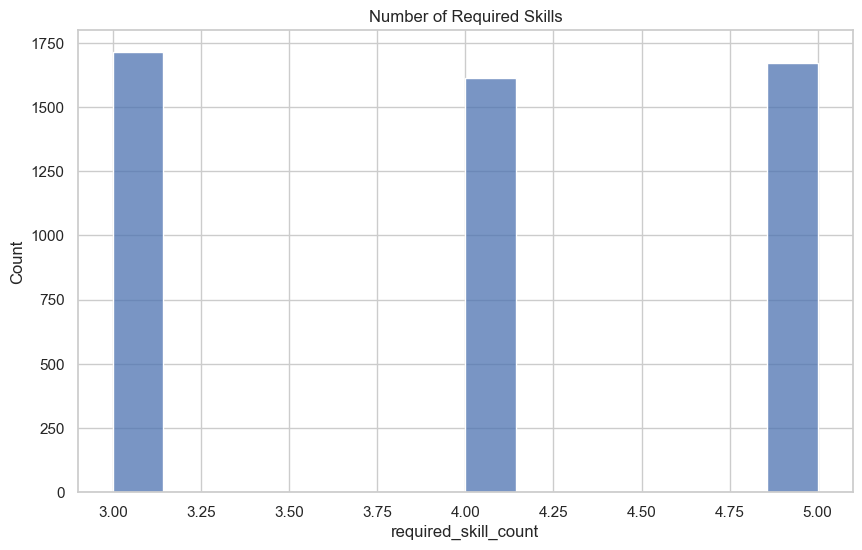

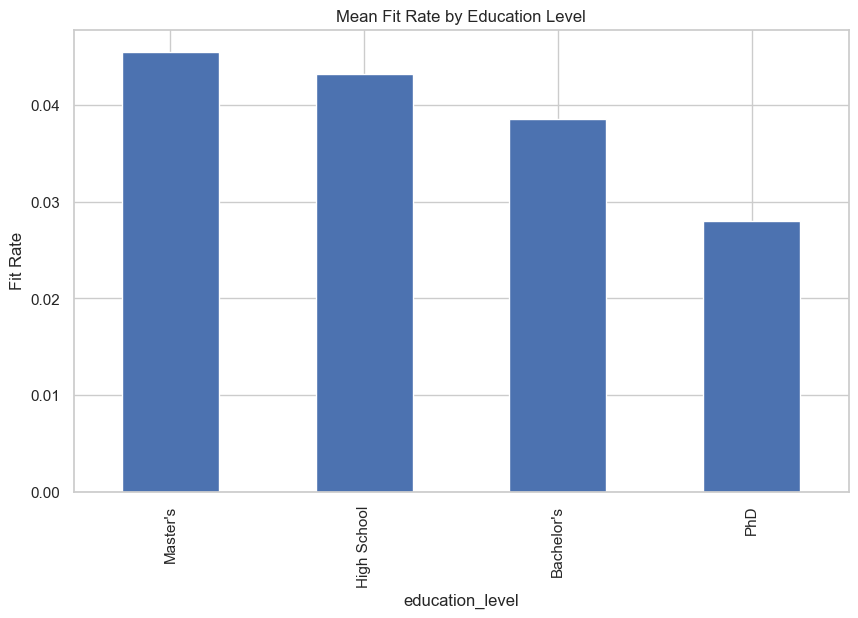

In [29]:
# Target variable distribution
sns.countplot(x='is_fit', data=df)
plt.title("Target Variable Distribution (is_fit)")
plt.show()

# Basic statistics for numeric features
numeric_cols = ['years_experience', 'expected_salary', 'min_experience', 'budgeted_salary_min', 'budgeted_salary_max']
df[numeric_cols].describe()

# Categorical feature distributions
categorical_cols = ['education_level', 'candidate_location', 'job_location']
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Box plots for numeric features vs target
for col in numeric_cols:
    sns.boxplot(data=df, x='is_fit', y=col)
    plt.title(f"{col} by Fit Label")
    plt.show()

# Correlation heatmap
corr = df[numeric_cols + ['is_fit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Job and candidate text field lengths
df['job_description_len'] = df['job_description'].str.len()
df['past_job_titles_len'] = df['past_job_titles'].str.len()
sns.histplot(df['job_description_len'], kde=True)
plt.title("Job Description Length Distribution")
plt.show()
sns.histplot(df['past_job_titles_len'], kde=True)
plt.title("Past Job Titles Length Distribution")
plt.show()

# Skill counts
df['candidate_skill_count'] = df['candidate_skills'].fillna('').apply(lambda x: len(x.split(",")))
df['required_skill_count'] = df['required_skills'].fillna('').apply(lambda x: len(x.split(",")))
sns.histplot(df['candidate_skill_count'], kde=False)
plt.title("Number of Candidate Skills")
plt.show()
sns.histplot(df['required_skill_count'], kde=False)
plt.title("Number of Required Skills")
plt.show()

# Mean fit rate by education level
fit_rate = df.groupby('education_level')['is_fit'].mean().sort_values(ascending=False)
fit_rate.plot(kind='bar', title='Mean Fit Rate by Education Level')
plt.ylabel("Fit Rate")
plt.show()

In [30]:

# Count class distribution
label_counts = df['is_fit'].value_counts()
label_percent = df['is_fit'].value_counts(normalize=True) * 100

# Display counts and percentages
for label in label_counts.index:
    print(f"Label {label}: {label_counts[label]} samples ({label_percent[label]:.2f}%)")

Label 0: 4806 samples (96.12%)
Label 1: 194 samples (3.88%)
